In [14]:
from libsvm.svm import *
from libsvm.svmutil import * 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

from PIL import Image

# Confirm mtcnn was installed correctly
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
DIRECTORY = "ciml7404/yale-dataset/"

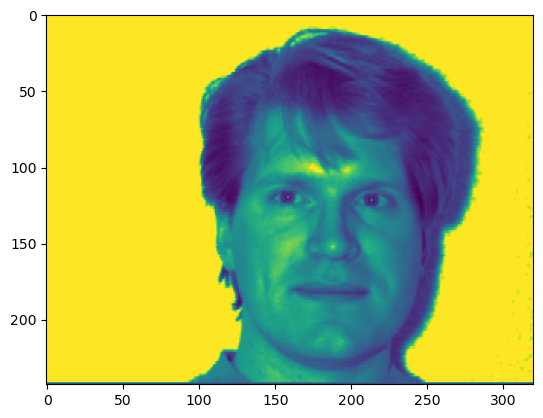

In [5]:
filename = "ciml7404/yale-dataset/subject01.centerlight"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
#print(rgb_pixels)
plt.imshow(pixels)
plt.show()

In [6]:
# Create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(rgb_pixels)
results

1/1 [==============================] - 0s 45ms/step


[{'box': [121, 69, 122, 154],
  'confidence': 0.9999041557312012,
  'keypoints': {'left_eye': (160, 122),
   'right_eye': (214, 123),
   'nose': (189, 152),
   'mouth_left': (163, 182),
   'mouth_right': (210, 184)}}]

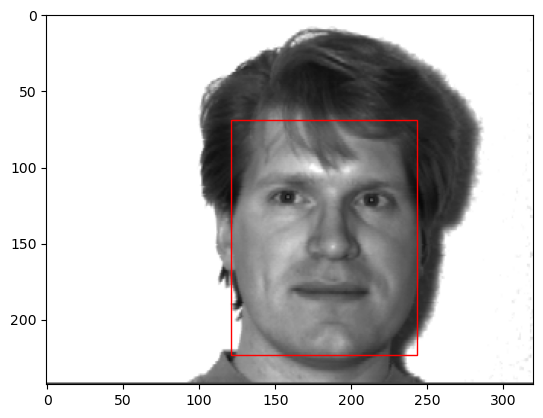

In [7]:
# draw an image with detected objects
def draw_image_with_boxes(data, result_list):
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# display faces on the original image
draw_image_with_boxes(rgb_pixels, results)

1/1 [==============================] - 0s 46ms/step


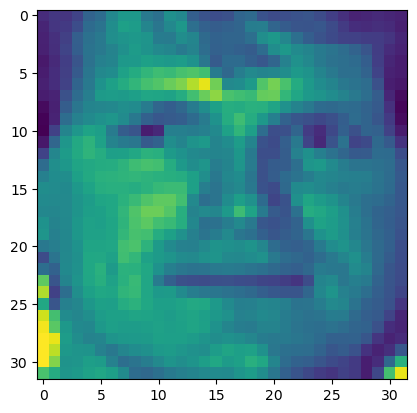

In [25]:
# extract a single face from a given photograph
def extract_face_from_file(filename, required_size=(32, 32)):
    # load image from file
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(32, 32)):
    # convert to RGB
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face


# Create the detector, using default weights
detector = MTCNN()

# load the photo and extract the face
face_pixels = extract_face_from_file("ciml7404/yale-dataset/subject01.centerlight")

plt.imshow(face_pixels)

In [9]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

  0%|                                                   | 0/165 [00:00<?, ?it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▎                                          | 1/165 [00:00<01:17,  2.11it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                          | 2/165 [00:00<00:55,  2.95it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▊                                          | 3/165 [00:00<00:46,  3.49it/s]

1/1 [==============================] - 0s 9ms/step


  2%|█                                          | 4/165 [00:01<00:42,  3.80it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                         | 5/165 [00:01<00:40,  3.96it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                         | 6/165 [00:01<00:38,  4.14it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▊                                         | 7/165 [00:01<00:36,  4.27it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██                                         | 8/165 [00:02<00:36,  4.35it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██▎                                        | 9/165 [00:02<00:35,  4.42it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                       | 10/165 [00:02<00:34,  4.53it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▊                                       | 11/165 [00:02<00:33,  4.57it/s]

1/1 [==============================] - 0s 9ms/step


  7%|███                                       | 12/165 [00:02<00:33,  4.62it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                      | 13/165 [00:03<00:32,  4.68it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▌                                      | 14/165 [00:03<00:31,  4.72it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                      | 15/165 [00:03<00:31,  4.77it/s]

1/1 [==============================] - 0s 10ms/step


 10%|████                                      | 16/165 [00:03<00:31,  4.77it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▎                                     | 17/165 [00:03<00:30,  4.80it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                     | 18/165 [00:04<00:30,  4.85it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▊                                     | 19/165 [00:04<00:30,  4.87it/s]

1/1 [==============================] - 0s 9ms/step


 12%|█████                                     | 20/165 [00:04<00:29,  4.85it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▎                                    | 21/165 [00:04<00:29,  4.84it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▌                                    | 22/165 [00:04<00:30,  4.74it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▊                                    | 23/165 [00:05<00:30,  4.72it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                    | 24/165 [00:05<00:29,  4.74it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████▎                                   | 25/165 [00:05<00:32,  4.28it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▌                                   | 26/165 [00:05<00:31,  4.43it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 27/165 [00:06<00:30,  4.59it/s]

1/1 [==============================] - 0s 10ms/step


 17%|███████▏                                  | 28/165 [00:06<00:29,  4.62it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▍                                  | 29/165 [00:06<00:28,  4.70it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 30/165 [00:06<00:28,  4.76it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 31/165 [00:06<00:27,  4.79it/s]

1/1 [==============================] - 0s 9ms/step


 19%|████████▏                                 | 32/165 [00:07<00:27,  4.85it/s]

1/1 [==============================] - 0s 12ms/step


 20%|████████▍                                 | 33/165 [00:07<00:27,  4.84it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▋                                 | 34/165 [00:07<00:27,  4.73it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▉                                 | 35/165 [00:07<00:27,  4.74it/s]

1/1 [==============================] - 0s 8ms/step


 22%|█████████▏                                | 36/165 [00:07<00:27,  4.78it/s]

1/1 [==============================] - 0s 10ms/step


 22%|█████████▍                                | 37/165 [00:08<00:26,  4.81it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▋                                | 38/165 [00:08<00:26,  4.86it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▉                                | 39/165 [00:08<00:25,  4.88it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████▏                               | 40/165 [00:08<00:25,  4.91it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▍                               | 41/165 [00:08<00:25,  4.87it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▋                               | 42/165 [00:09<00:25,  4.85it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▉                               | 43/165 [00:09<00:25,  4.84it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▏                              | 44/165 [00:09<00:24,  4.88it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 45/165 [00:09<00:24,  4.89it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▋                              | 46/165 [00:10<00:24,  4.88it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▉                              | 47/165 [00:10<00:24,  4.85it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▏                             | 48/165 [00:10<00:24,  4.80it/s]

1/1 [==============================] - 0s 11ms/step


 30%|████████████▍                             | 49/165 [00:10<00:24,  4.77it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▋                             | 50/165 [00:10<00:24,  4.66it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▉                             | 51/165 [00:11<00:24,  4.67it/s]

1/1 [==============================] - 0s 10ms/step


 32%|█████████████▏                            | 52/165 [00:11<00:23,  4.72it/s]

1/1 [==============================] - 0s 10ms/step


 32%|█████████████▍                            | 53/165 [00:11<00:23,  4.76it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▋                            | 54/165 [00:11<00:23,  4.83it/s]

1/1 [==============================] - 0s 11ms/step


 33%|██████████████                            | 55/165 [00:11<00:23,  4.78it/s]

1/1 [==============================] - 0s 9ms/step


 34%|██████████████▎                           | 56/165 [00:12<00:22,  4.79it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▌                           | 57/165 [00:12<00:22,  4.78it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▊                           | 58/165 [00:12<00:22,  4.79it/s]

1/1 [==============================] - 0s 8ms/step


 36%|███████████████                           | 59/165 [00:12<00:21,  4.87it/s]

1/1 [==============================] - 0s 10ms/step


 36%|███████████████▎                          | 60/165 [00:12<00:22,  4.75it/s]

1/1 [==============================] - 0s 10ms/step


 37%|███████████████▌                          | 61/165 [00:13<00:22,  4.66it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▊                          | 62/165 [00:13<00:22,  4.64it/s]

1/1 [==============================] - 0s 10ms/step


 38%|████████████████                          | 63/165 [00:13<00:22,  4.58it/s]

1/1 [==============================] - 0s 11ms/step


 39%|████████████████▎                         | 64/165 [00:13<00:22,  4.50it/s]

1/1 [==============================] - 0s 10ms/step


 39%|████████████████▌                         | 65/165 [00:14<00:21,  4.60it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▊                         | 66/165 [00:14<00:21,  4.68it/s]

1/1 [==============================] - 0s 10ms/step


 41%|█████████████████                         | 67/165 [00:14<00:20,  4.73it/s]

1/1 [==============================] - 0s 10ms/step


 41%|█████████████████▎                        | 68/165 [00:14<00:20,  4.70it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▌                        | 69/165 [00:14<00:21,  4.57it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▊                        | 70/165 [00:15<00:20,  4.61it/s]

1/1 [==============================] - 0s 10ms/step


 43%|██████████████████                        | 71/165 [00:15<00:20,  4.65it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████▎                       | 72/165 [00:15<00:19,  4.73it/s]

1/1 [==============================] - 0s 10ms/step


 44%|██████████████████▌                       | 73/165 [00:15<00:19,  4.77it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▊                       | 74/165 [00:15<00:18,  4.82it/s]

1/1 [==============================] - 0s 10ms/step


 45%|███████████████████                       | 75/165 [00:16<00:18,  4.84it/s]

1/1 [==============================] - 0s 9ms/step


 46%|███████████████████▎                      | 76/165 [00:16<00:18,  4.83it/s]

1/1 [==============================] - 0s 10ms/step


 47%|███████████████████▌                      | 77/165 [00:16<00:18,  4.84it/s]

1/1 [==============================] - 0s 19ms/step


 47%|███████████████████▊                      | 78/165 [00:16<00:18,  4.77it/s]

1/1 [==============================] - 0s 9ms/step


 48%|████████████████████                      | 79/165 [00:17<00:18,  4.77it/s]

1/1 [==============================] - 0s 9ms/step


 48%|████████████████████▎                     | 80/165 [00:17<00:17,  4.78it/s]

1/1 [==============================] - 0s 10ms/step


 49%|████████████████████▌                     | 81/165 [00:17<00:17,  4.81it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▊                     | 82/165 [00:17<00:17,  4.83it/s]

1/1 [==============================] - 0s 10ms/step


 50%|█████████████████████▏                    | 83/165 [00:17<00:17,  4.77it/s]

1/1 [==============================] - 0s 9ms/step


 51%|█████████████████████▍                    | 84/165 [00:18<00:17,  4.72it/s]

1/1 [==============================] - 0s 10ms/step


 52%|█████████████████████▋                    | 85/165 [00:18<00:17,  4.68it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▉                    | 86/165 [00:18<00:17,  4.63it/s]

1/1 [==============================] - 0s 9ms/step


 53%|██████████████████████▏                   | 87/165 [00:18<00:16,  4.70it/s]

1/1 [==============================] - 0s 10ms/step


 53%|██████████████████████▍                   | 88/165 [00:18<00:16,  4.69it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▋                   | 89/165 [00:19<00:16,  4.64it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▉                   | 90/165 [00:19<00:15,  4.69it/s]

1/1 [==============================] - 0s 10ms/step


 55%|███████████████████████▏                  | 91/165 [00:19<00:15,  4.74it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▍                  | 92/165 [00:19<00:15,  4.74it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▋                  | 93/165 [00:19<00:15,  4.74it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▉                  | 94/165 [00:20<00:14,  4.79it/s]

1/1 [==============================] - 0s 9ms/step


 58%|████████████████████████▏                 | 95/165 [00:20<00:14,  4.82it/s]

1/1 [==============================] - 0s 10ms/step


 58%|████████████████████████▍                 | 96/165 [00:20<00:14,  4.86it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████▋                 | 97/165 [00:21<00:27,  2.43it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████▉                 | 98/165 [00:21<00:23,  2.80it/s]

1/1 [==============================] - 0s 10ms/step


 60%|█████████████████████████▏                | 99/165 [00:21<00:20,  3.16it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▊                | 100/165 [00:22<00:18,  3.49it/s]

1/1 [==============================] - 0s 9ms/step


 61%|█████████████████████████                | 101/165 [00:22<00:17,  3.75it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▎               | 102/165 [00:22<00:15,  4.00it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▌               | 103/165 [00:22<00:14,  4.16it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▊               | 104/165 [00:23<00:14,  4.27it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████               | 105/165 [00:23<00:13,  4.41it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 106/165 [00:23<00:13,  4.52it/s]

1/1 [==============================] - 0s 10ms/step


 65%|██████████████████████████▌              | 107/165 [00:23<00:12,  4.59it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▊              | 108/165 [00:23<00:12,  4.62it/s]

1/1 [==============================] - 0s 10ms/step


 66%|███████████████████████████              | 109/165 [00:24<00:12,  4.64it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▎             | 110/165 [00:24<00:11,  4.71it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▌             | 111/165 [00:24<00:11,  4.73it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 112/165 [00:24<00:11,  4.77it/s]

1/1 [==============================] - 0s 11ms/step


 68%|████████████████████████████             | 113/165 [00:24<00:11,  4.64it/s]

1/1 [==============================] - 0s 8ms/step


 69%|████████████████████████████▎            | 114/165 [00:25<00:10,  4.68it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▌            | 115/165 [00:25<00:10,  4.71it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▊            | 116/165 [00:25<00:10,  4.75it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████            | 117/165 [00:25<00:09,  4.80it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▎           | 118/165 [00:25<00:09,  4.80it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▌           | 119/165 [00:26<00:09,  4.82it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▊           | 120/165 [00:26<00:09,  4.83it/s]

1/1 [==============================] - 0s 10ms/step


 73%|██████████████████████████████           | 121/165 [00:26<00:09,  4.85it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▎          | 122/165 [00:26<00:08,  4.87it/s]

1/1 [==============================] - 0s 10ms/step


 75%|██████████████████████████████▌          | 123/165 [00:26<00:08,  4.81it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▊          | 124/165 [00:27<00:08,  4.77it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████          | 125/165 [00:27<00:08,  4.78it/s]

1/1 [==============================] - 0s 14ms/step


 76%|███████████████████████████████▎         | 126/165 [00:27<00:08,  4.70it/s]

1/1 [==============================] - 0s 11ms/step


 77%|███████████████████████████████▌         | 127/165 [00:27<00:08,  4.73it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 128/165 [00:28<00:07,  4.76it/s]

1/1 [==============================] - 0s 10ms/step


 78%|████████████████████████████████         | 129/165 [00:28<00:07,  4.79it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▎        | 130/165 [00:28<00:07,  4.78it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▌        | 131/165 [00:28<00:07,  4.80it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▊        | 132/165 [00:28<00:06,  4.82it/s]

1/1 [==============================] - 0s 10ms/step


 81%|█████████████████████████████████        | 133/165 [00:29<00:06,  4.68it/s]

1/1 [==============================] - 0s 11ms/step


 81%|█████████████████████████████████▎       | 134/165 [00:29<00:06,  4.60it/s]

1/1 [==============================] - 0s 10ms/step


 82%|█████████████████████████████████▌       | 135/165 [00:29<00:06,  4.58it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▊       | 136/165 [00:29<00:06,  4.52it/s]

1/1 [==============================] - 0s 11ms/step


 83%|██████████████████████████████████       | 137/165 [00:29<00:06,  4.57it/s]

1/1 [==============================] - 0s 10ms/step


 84%|██████████████████████████████████▎      | 138/165 [00:30<00:05,  4.65it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 139/165 [00:30<00:05,  4.42it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▊      | 140/165 [00:30<00:05,  4.55it/s]

1/1 [==============================] - 0s 10ms/step


 85%|███████████████████████████████████      | 141/165 [00:30<00:05,  4.57it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▎     | 142/165 [00:31<00:04,  4.64it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▌     | 143/165 [00:31<00:04,  4.72it/s]

1/1 [==============================] - 0s 10ms/step


 87%|███████████████████████████████████▊     | 144/165 [00:31<00:04,  4.75it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████     | 145/165 [00:31<00:04,  4.77it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████▎    | 146/165 [00:31<00:03,  4.76it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▌    | 147/165 [00:32<00:03,  4.81it/s]

1/1 [==============================] - 0s 10ms/step


 90%|████████████████████████████████████▊    | 148/165 [00:32<00:03,  4.80it/s]

1/1 [==============================] - 0s 10ms/step


 90%|█████████████████████████████████████    | 149/165 [00:32<00:03,  4.78it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 150/165 [00:32<00:03,  4.81it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▌   | 151/165 [00:32<00:02,  4.78it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▊   | 152/165 [00:33<00:02,  4.79it/s]

1/1 [==============================] - 0s 11ms/step


 93%|██████████████████████████████████████   | 153/165 [00:33<00:02,  4.76it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████▎  | 154/165 [00:33<00:02,  4.80it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▌  | 155/165 [00:33<00:02,  4.81it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▊  | 156/165 [00:34<00:02,  4.36it/s]

1/1 [==============================] - 0s 9ms/step


 95%|███████████████████████████████████████  | 157/165 [00:34<00:01,  4.49it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▎ | 158/165 [00:34<00:01,  4.59it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▌ | 159/165 [00:34<00:01,  4.67it/s]

1/1 [==============================] - 0s 10ms/step


 97%|███████████████████████████████████████▊ | 160/165 [00:34<00:01,  4.71it/s]

1/1 [==============================] - 0s 10ms/step


 98%|████████████████████████████████████████ | 161/165 [00:35<00:00,  4.68it/s]

1/1 [==============================] - 0s 10ms/step


 98%|████████████████████████████████████████▎| 162/165 [00:35<00:00,  4.73it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▌| 163/165 [00:35<00:00,  4.76it/s]

1/1 [==============================] - 0s 8ms/step


 99%|████████████████████████████████████████▊| 164/165 [00:35<00:00,  4.83it/s]

1/1 [==============================] - 0s 10ms/step


100%|█████████████████████████████████████████| 165/165 [00:35<00:00,  4.59it/s]


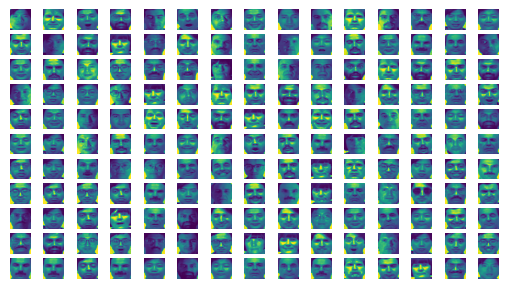

In [31]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY, "subject")):
    # path
    path = DIRECTORY + filename
    # get face
    face = extract_face_from_file(path)
   
    # plot
    plt.subplot(15, 15, i)
    plt.axis('off')
    plt.imshow(face) 
    plt.imsave('./ciml7404/'+filename+'.png',face)
    faces.append(face)
    i += 1
plt.show()